# Implementation of FIR Filter in the FPGA

In [3]:
import numpy as np
from numpy import savetxt, loadtxt
import matplotlib.pyplot as plt

In [5]:
# Let us generate a wave function with two main frequencies, an high one and a low one:

data_size = 200
noise = 1 # the higher the noisier


input_sig = []

for i in range(data_size):
    sig = 62*(np.sin(i/10)+ noise)
    noise = -noise
    input_sig.append(sig.astype(int)) # we write it as an int

In [ ]:
# Now we visualize it:

t = np.arange(len(input_sig)) # array for the x coordinate, just for displaying

plt.figure(figsize=(15, 5))

plt.plot(t, input_sig, '-o',alpha=.6,label='raw signal')
plt.legend(loc="upper left")

In [ ]:
# After being computed on the actual FPGA

In [10]:
# I just copied from the terminal, had some problems in reading from a file :/
fpga = [0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,6,12,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,13,8,2,2,2,2,2,2,2,2,1,-5,-11,-12,-12,-12,-12,-12,-12,-12,-12,-14,-15,-15,-15,-15,-15,-15,-15,-15,-15,-10,-5,-5,-5,-5,-5,-5,-5,-5,-4,2,9,10,10,10,10,10,10,10,10,12,15,15,15,15,15,15,15,15,14,10,6,6,6,6,6,6,6,6,5,-1,-8,-9,-9,-9,-9,-9,-9,-9,-9,-12,-16,-16,-16,-16,-16,-16,-16,-16,-16,-12,-9,-9,-9,-9,-9,-9,-9,-9,-8,-1,5,6,6,6,6,6,6,6,7,11,14,15,15,15,15,15,15,15,15,12,10,10,10,10,10,10,10,10,9,2,-4,-5,-5,-5,-5,-5,-5,-5,-5,-10,-15,-15,-15,-15,-15,-15,-15,-15,-15,-14,-12,-12,-12,-12,-12,-12,-12,-12,-11,-5,1,2,2,2]
for i in range(len(fpga)):
    # 2**10 due to truncation of bits
    # 2**9 because I multiplied the coefficients by 2**9
    fpga[i] = (2**11/2**9)*fpga[i]

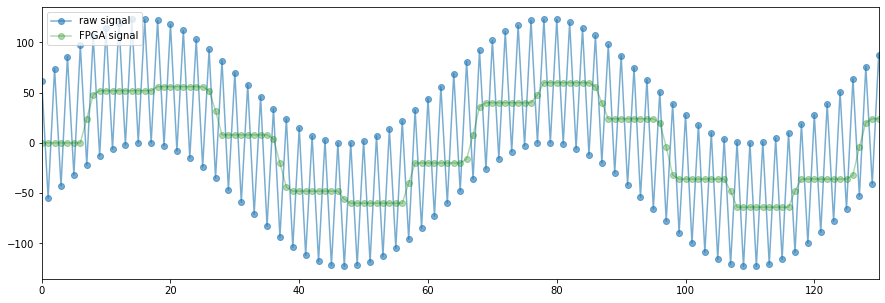

In [11]:
plt.figure(figsize=(15, 5))

t = np.arange(len(input_sig))
plt.plot(t, input_sig, '-o',alpha=.6,label='raw signal')
t = np.arange(len(fpga))
plt.plot(t-8, fpga, '-o', color='g',alpha=.3,label='FPGA signal')
#plt.title("")
plt.xlim(0,130) #just for the latex report
plt.legend(loc="upper left")